###Analyse

---


* Wat is het probleem? 
   - Het probleem is dat we prijs willen voorspellen (Regressie).
* Wat voor labels heb je?
  - price
* Dimensie data set?
  - Er zijn 53940 records en 10 kolommen
* Soorten data/features?
De features bestaan uit tekst en getallen, de features zijn:
  - price: price in US dollars
  - carat: weight of the diamond (0.2--5.01)
  - cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
  - color: diamond colour, from J (worst) to D (best)
  - clarity: a measurement of how clear the diamond is 
  - x: length in mm (0--10.74)
  - y: width in mm (0--58.9)
  - z: depth in mm (0--31.8)
  - depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)




###Voorspelling:

---
* Welke classifier zal het beste zijn en waarom? 
  * De random forest, omdat deze over het algemeen goede accuuraatheid heeft en het goed doet op kleinere datasets. 
* Welke hyperparameters zijn relevant en waarom?
  - Voor beide is Grid search cross validation een goede manier om de hyperparameters te 'tunen'.

###Methoden

---


* Welke preprocessing stappen zijn nodig?
  - Categorische data omzetten naar binaire data.
  - onnodige kolommen verwijderen
  - 
* Welke classifiers ga je vergelijken? (Minimaal 2 per dataset)
  - Linear regression omdat deze goed werkt met linaire data en random forrest vanwege de hoge accuraatheid.
* Welke performance metric is passend?
  - De R2 score omdat het goed weergeeft hoe veel het afwijkt.

###Resultaten

---



*Niet alleen beste resultaat geven, het gaat juist ook om de vergelijking/verbetering!*
* Minimaal 1 visualisatie/plotje per dataset.
* Evaluatie/conclusie
* Welke classifier leverde beste resultaat op?
* Klopt dit met je voorspelling? Waarom wel/niet?

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from pandas.plotting import scatter_matrix
import seaborn as sns
import pylab as plb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold



from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import math

%matplotlib inline

In [ ]:
# Verover data en bekijk het
df = pd.read_csv("/content/drive/My Drive/minor/ML/diamonds.csv", sep =",")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Verwijder kolommen die onnoodig zijn 
# (Unnamed: 0 verteld niet veel over de diamanten)
df = df.drop(["Unnamed: 0"],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Kijk of er null-waarden zijn
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.shape

(53940, 10)

In [ ]:
# Kijk of er categorische data is en vervang deze
cat_data = df.select_dtypes(exclude = [np.number]).columns
print(cat_data)

for column in cat_data:
    df[column] = df[column].astype("category").cat.codes
df.head()

Index(['cut', 'color', 'clarity'], dtype='object')


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


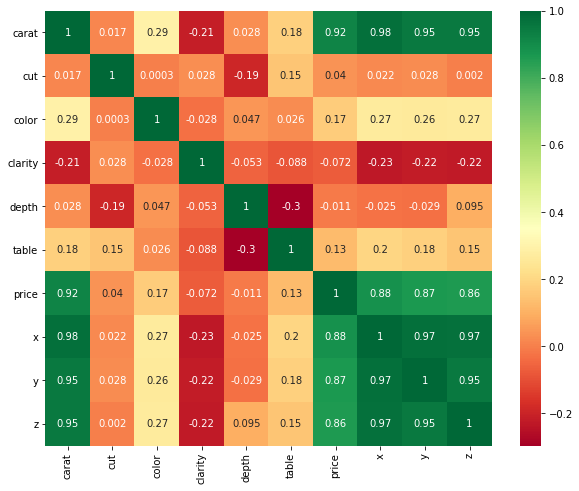

In [ ]:
# Corr matrix 
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Hieruit te lezen is dat
- X, y en z (de afmetingen van de diamant) en carat (de helderheid) een hoge correlatie hebben met de prijs

In [ ]:
X = df.drop('price', axis=1)
print(X.shape)

y = df.price
print(y.shape)

(53940, 9)
(53940,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6)

In [ ]:
# Lineare regressie
model =LinearRegression()
model.fit(X_train, y_train)
lr_pred = model.predict(X_test)
R2_LR = r2_score(y_test,lr_pred)
print(f'R2 Linear regression: {R2_LR}')

R2 Linear regression: 0.878519180598055


In [ ]:
# Random forest
model2 = RandomForestRegressor(max_depth=9)
model2= model2.fit(X_train, y_train)
rf_pred = model2.predict(X_test)

model2.score(X_test, y_test)
R2_RF = r2_score(y_test,rf_pred)

print(f'R2 score Random Forrest: {R2_RF}') 

R2 score Random Forrest: 0.9764353133220862


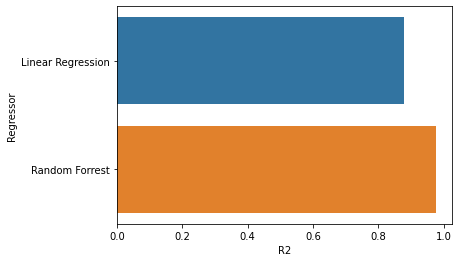

In [ ]:
# R2 Scores plotten en vergelijken
compare_r2 = pd.DataFrame({'Regressor' : ['Linear Regression', 'Random Forrest'] , 'R2' : [R2_LR,R2_RF]})
sns.barplot(x='R2' , y='Regressor' , data=compare_r2)

Hier is duidelijk te zien dat de Random Forrest het een stuk beter gedaan heeft dan de Lineare Regressie.

#### **Evaluatie/conclusie**
Welke classifier leverde beste resultaat op?
  - De Random Forest, deze komt op een R2 van 0.97. 

Klopt dit met je voorspelling? Waarom wel/niet?
  - Dit klopt met mijn voorspelling, dat is te zien aan de R-score en de barplot. Dit komt omdat de random forest hogere accuraatheid heeft en minder overfit.